In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from scipy import stats

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

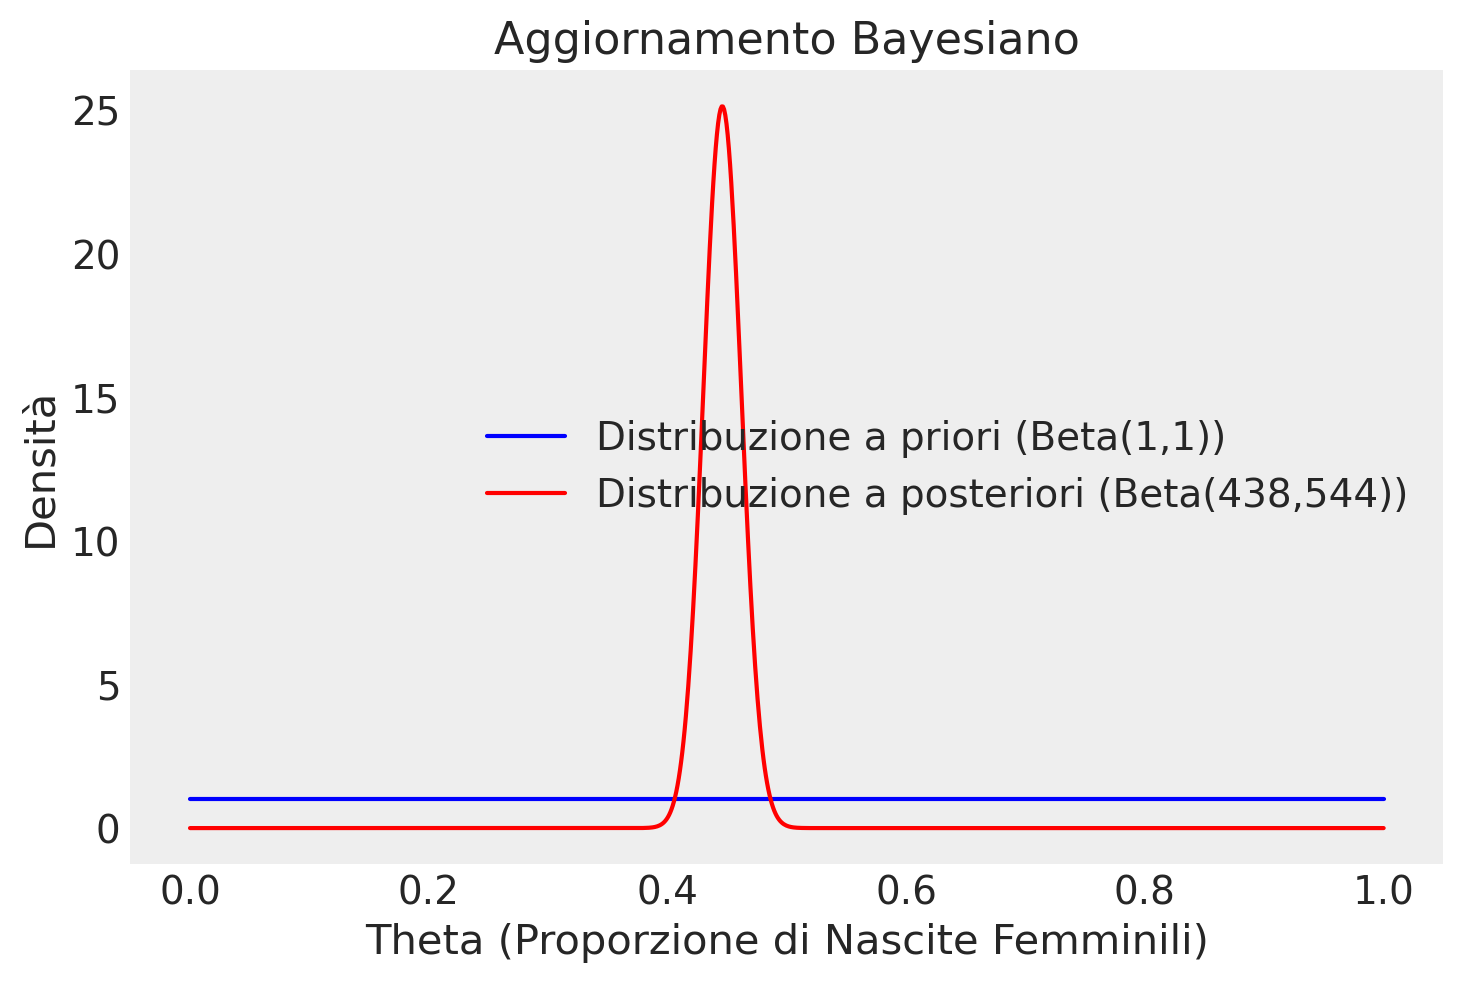

In [3]:
# Parameters for prior and posterior
alpha_prior, beta_prior = 1, 1
y, n = 437, 980
alpha_posterior, beta_posterior = alpha_prior + y, beta_prior + n - y

# Theta values for plotting
theta_values = np.linspace(0, 1, 1000)

# Prior Distribution (Beta(1,1) - Uniform)
prior_distribution = stats.beta(alpha_prior, beta_prior).pdf(theta_values)

# Posterior Distribution (Beta(438,544))
posterior_distribution = stats.beta(alpha_posterior, beta_posterior).pdf(theta_values)

plt.plot(
    theta_values,
    prior_distribution,
    label="Distribuzione a priori (Beta(1,1))",
    color="blue",
)
plt.plot(
    theta_values,
    posterior_distribution,
    label="Distribuzione a posteriori (Beta(438,544))",
    color="red",
)

plt.title("Aggiornamento Bayesiano")
plt.xlabel("Theta (Proporzione di Nascite Femminili)")
plt.ylabel("Densità")
plt.legend()
plt.grid()

plt.show()

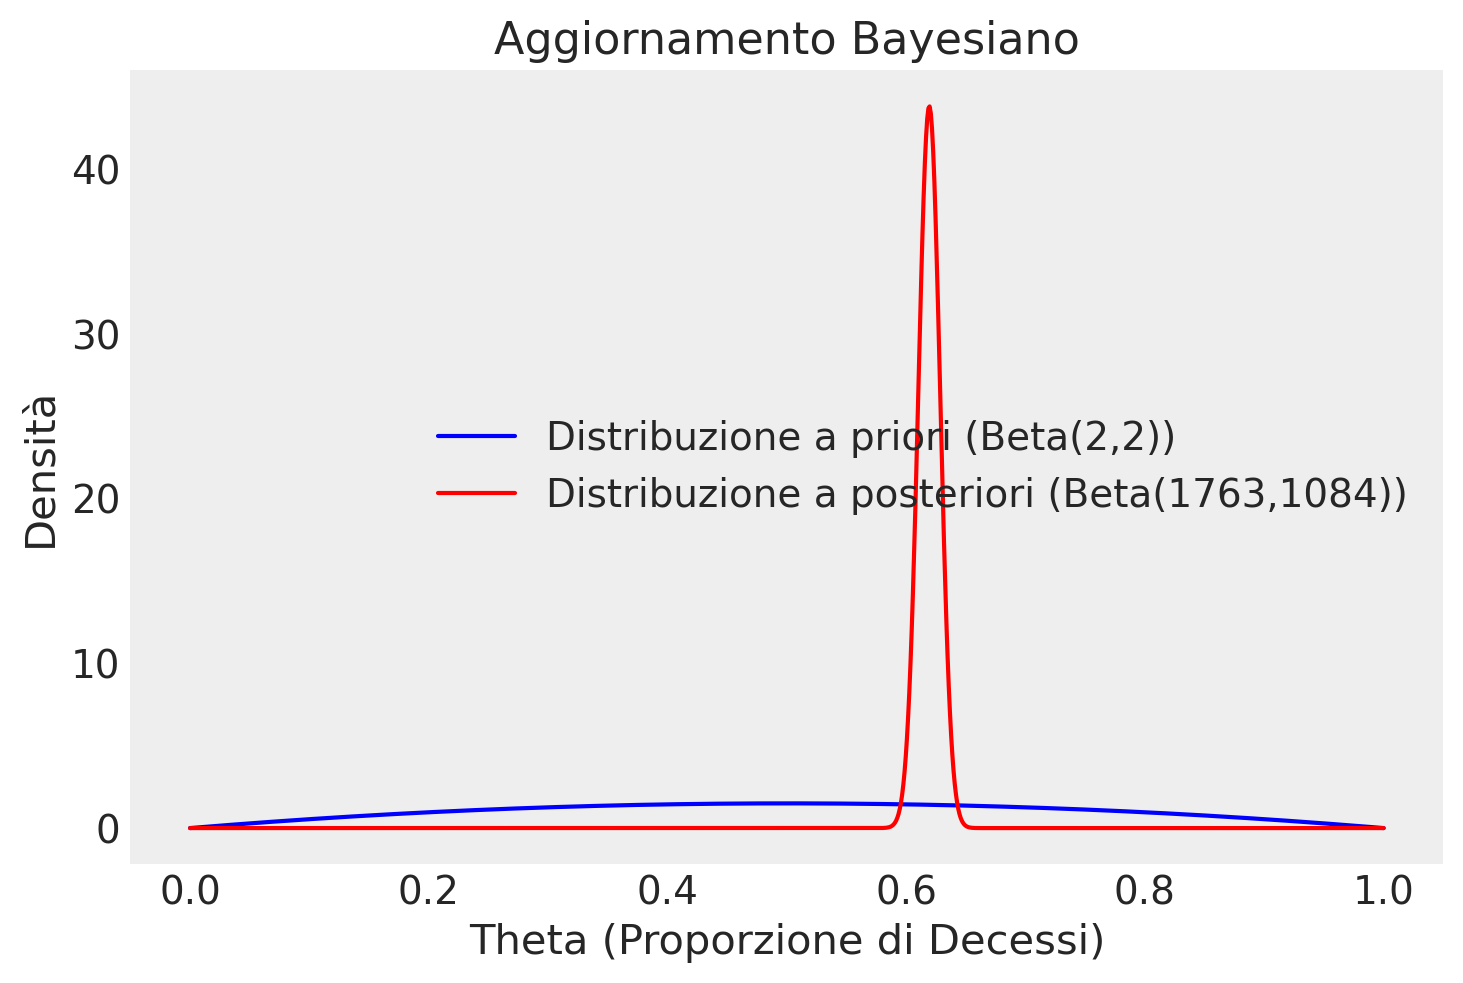

In [4]:
# Parameters for prior and posterior in the AIDS example
alpha_prior, beta_prior = 2, 2
deaths, total_cases = 1761, 2843
survivors = total_cases - deaths
alpha_posterior, beta_posterior = alpha_prior + deaths, beta_prior + survivors

# Theta values for plotting
theta_values = np.linspace(0, 1, 1000)

# Prior Distribution (Beta(2,2))
prior_distribution = stats.beta(alpha_prior, beta_prior).pdf(theta_values)

# Posterior Distribution (Beta(1763,1084))
posterior_distribution = stats.beta(alpha_posterior, beta_posterior).pdf(theta_values)

plt.plot(
    theta_values,
    prior_distribution,
    label="Distribuzione a priori (Beta(2,2))",
    color="blue",
)
plt.plot(
    theta_values,
    posterior_distribution,
    label="Distribuzione a posteriori (Beta(1763,1084))",
    color="red",
)

plt.title("Aggiornamento Bayesiano")
plt.xlabel("Theta (Proporzione di Decessi)")
plt.ylabel("Densità")
plt.legend()
plt.grid()

plt.show()

In [5]:
def summarize_beta(alpha, beta):
    """Summarize a Beta Model for \eqn{\pi}

    @param alpha,beta positive shape parameters of the Beta model

    Return Pandas Series with summary
    """

    mean = alpha / (alpha + beta)
    var = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    sd = np.sqrt(var)

    if alpha < 1 and beta < 1:
        mode = "0 and 1"
    elif alpha <= 1 and beta > 1:
        mode = 0
    elif alpha > 1 and beta < 1:
        mode = 1
    else:
        mode = (alpha - 1) / (alpha + beta - 2)
    return pd.Series({"mean": mean, "mode": mode, "var": var, "sd": sd})

In [6]:
summarize_beta(alpha=2, beta=2)

mean    0.500000
mode    0.500000
var     0.050000
sd      0.223607
dtype: float64

In [7]:
li = stats.beta.ppf(0.03, 2, 2)
ls = stats.beta.ppf(0.97, 2, 2)
list([li, ls])

[0.10364483924951279, 0.8963551607504872]

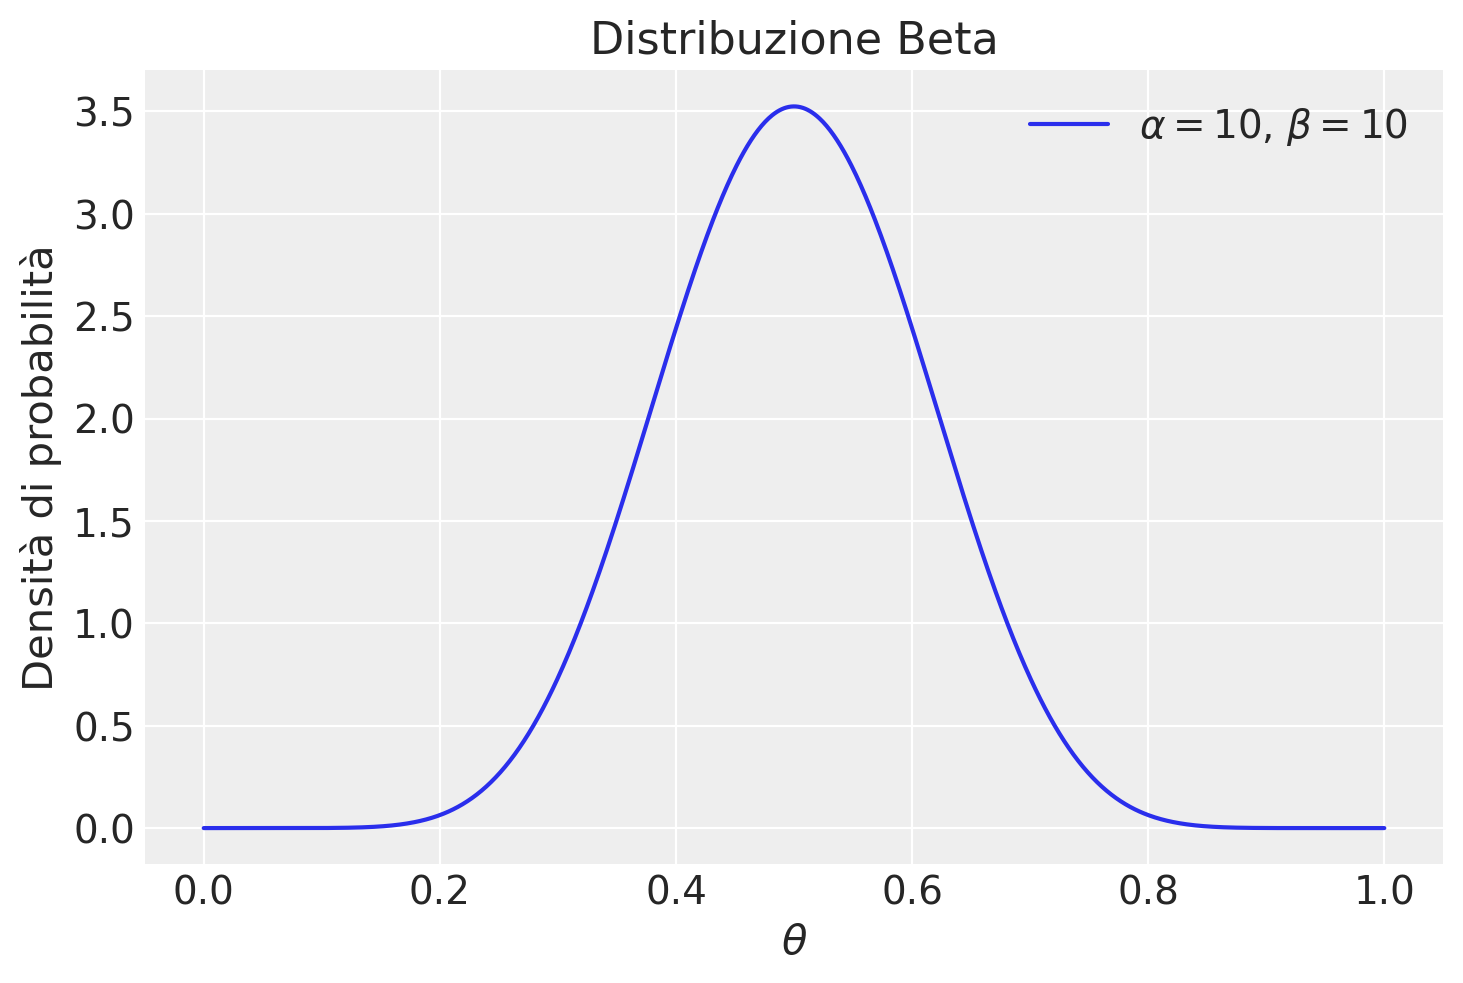

In [8]:
# Crea un array di valori di theta
theta = np.linspace(0, 1, 1000)
pdf_pre = stats.beta.pdf(theta, 10, 10)
plt.plot(theta, pdf_pre, label=r'$\alpha=10$, $\beta=10$')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione Beta')
plt.legend()
plt.show()

In [9]:
li = stats.beta.ppf(0.03, 10, 10)
ls = stats.beta.ppf(0.97, 10, 10)
list([li, ls])

[0.2964110284916252, 0.7035889715083747]

In [10]:
summarize_beta(1763, 1084)

mean    0.619248
mode    0.619332
var     0.000083
sd      0.009099
dtype: float64

In [11]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

In [12]:
[.62 - stats.norm.ppf(0.97) * 0.0091, .62 + stats.norm.ppf(0.97) * 0.0091]

[0.6028847781658236, 0.6371152218341763]

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_89943/1990880785.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


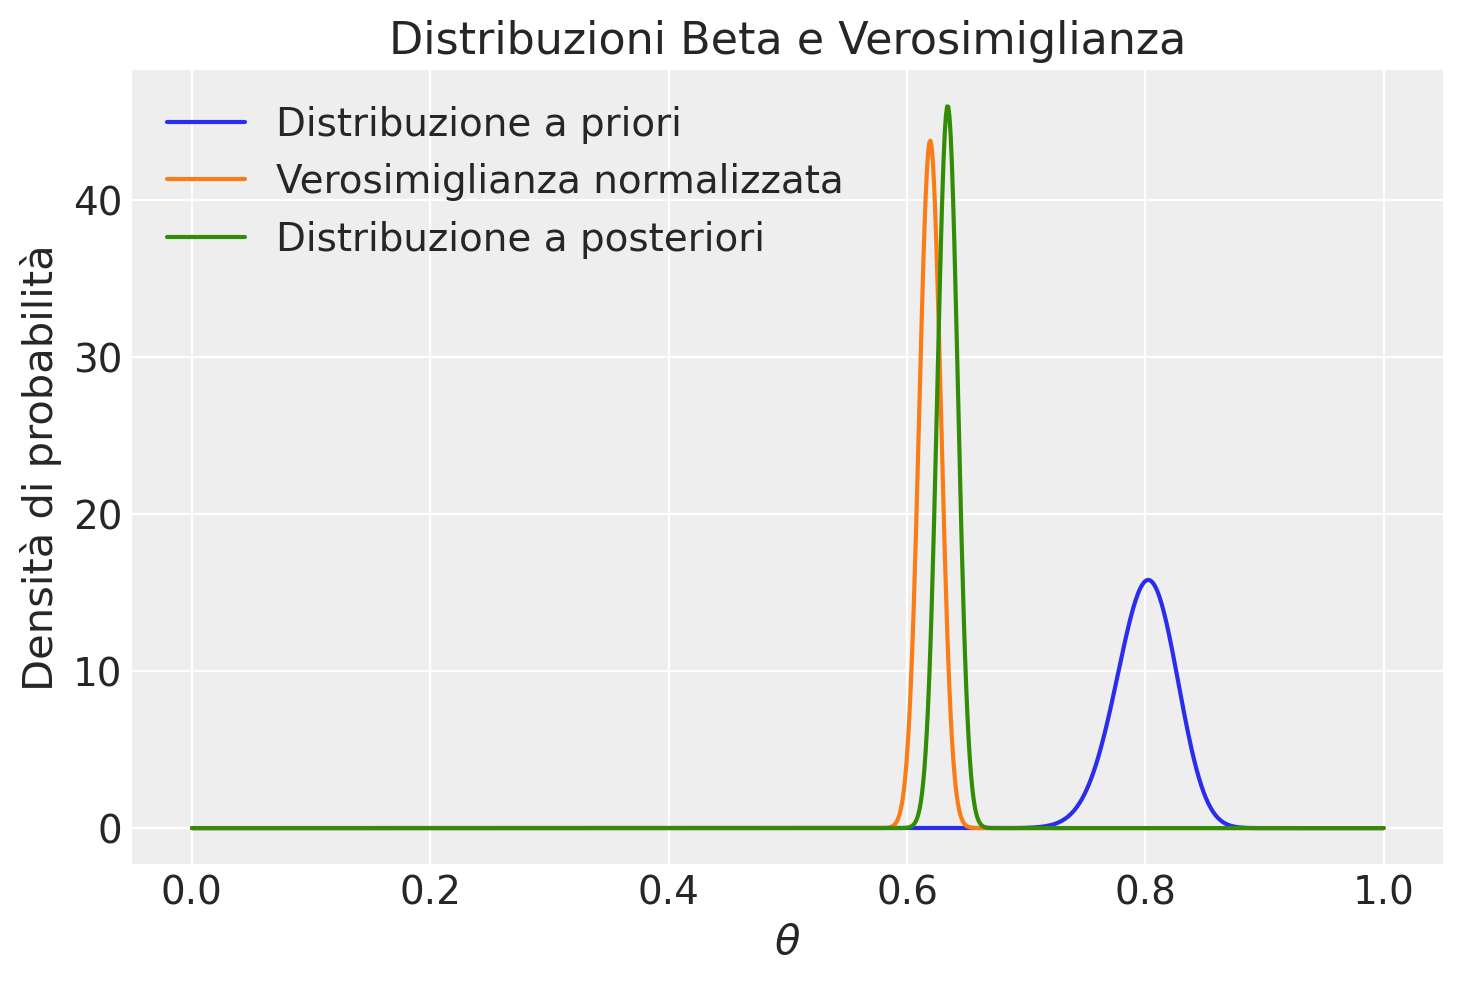

In [13]:
y = 1761
n = 2843

# Parametri delle distribuzioni beta
alpha_pre = 200
beta_pre = 50

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzioni Beta e Verosimiglianza')
plt.legend()
plt.show();

In [14]:
li = stats.beta.ppf(0.03, 1763, 1084)
ls = stats.beta.ppf(0.97, 1763, 1084)
list([li, ls])

[0.6020654882558294, 0.6362894604661353]

/var/folders/cl/wwjrsxdd5tz7y9jr82nd5hrw0000gn/T/ipykernel_89943/2806277110.py:16: RuntimeWarning: divide by zero encountered in log
  log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)


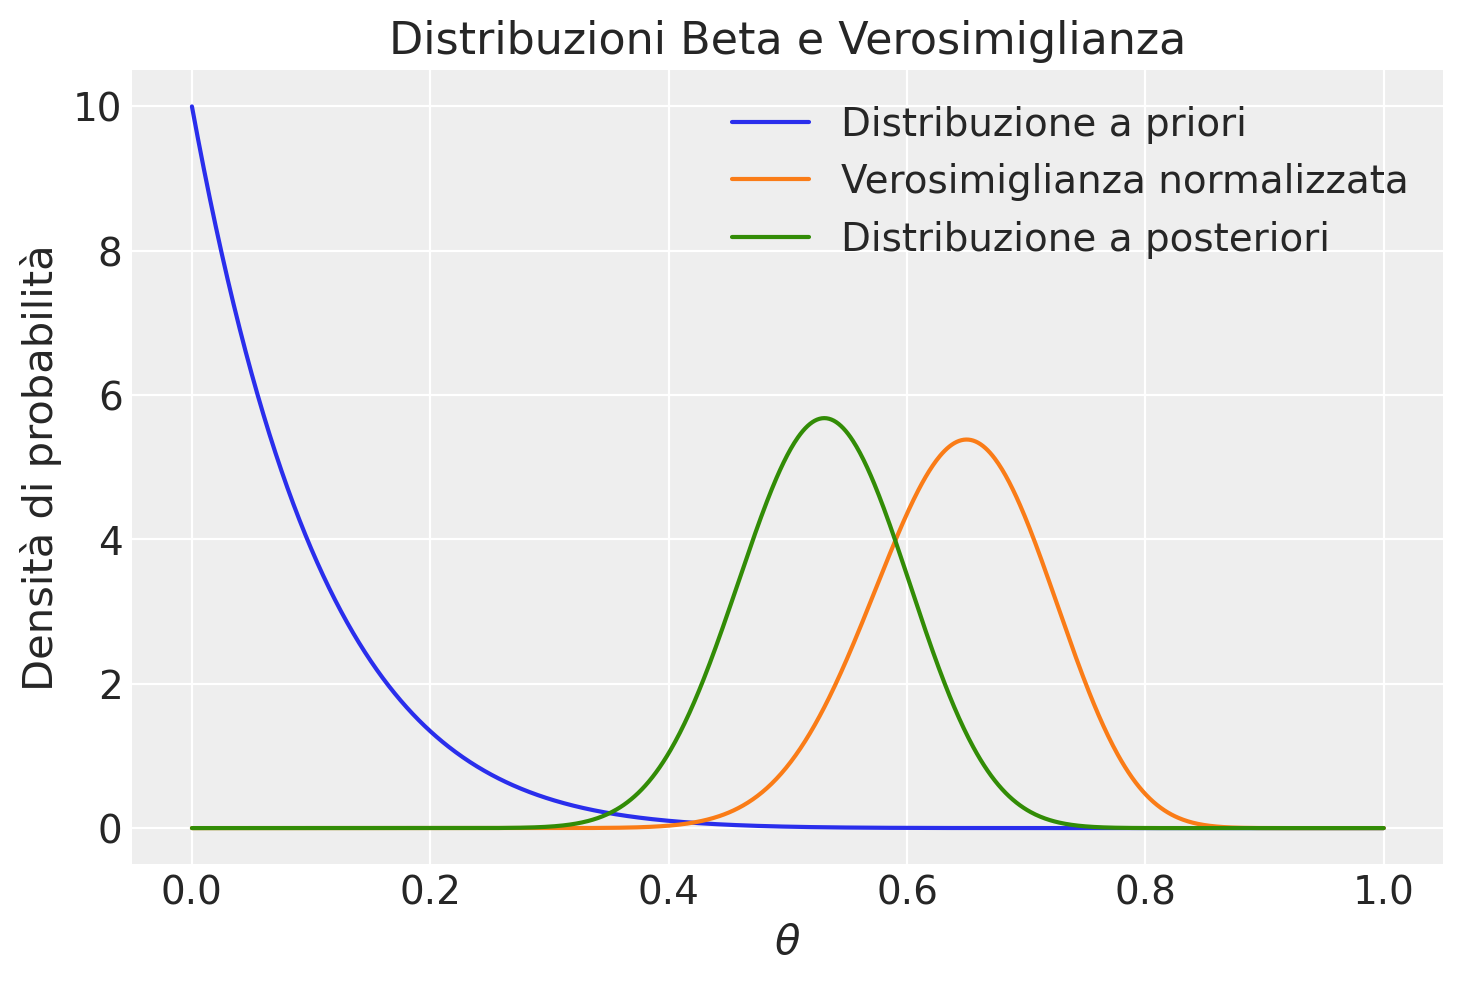

In [15]:
y = 26
n = 40

# Parametri delle distribuzioni beta
alpha_pre = 1
beta_pre = 10

alpha_post = alpha_pre + y
beta_post = beta_pre + n - y

# Calcola i valori delle distribuzioni beta
pdf_pre = stats.beta.pdf(theta, alpha_pre, beta_pre)
pdf_post = stats.beta.pdf(theta, alpha_post, beta_post)

# Calcola la log-verosimiglianza
log_likelihood = y * np.log(theta) + (n - y) * np.log(1 - theta)

# Scala la log-verosimiglianza per evitare valori molto piccoli
scaled_log_likelihood = log_likelihood - np.max(log_likelihood)

# Calcola la verosimiglianza normalizzata
normalized_likelihood = np.exp(scaled_log_likelihood)
normalized_likelihood /= np.trapz(normalized_likelihood, theta)

# Crea il grafico
plt.plot(theta, pdf_pre, label=r'Distribuzione a priori')
plt.plot(theta, normalized_likelihood, label=r'Verosimiglianza normalizzata')
plt.plot(theta, pdf_post, label=r'Distribuzione a posteriori')
plt.xlabel(r'$\theta$')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzioni Beta e Verosimiglianza')
plt.legend()
plt.show()

In [16]:
li = stats.beta.ppf(0.03, 1 + 26, 10 + 40 - 26)
ls = stats.beta.ppf(0.97, 1 + 26, 10 + 40 - 26)
list([li, ls])

[0.3986201110959706, 0.6582462555099745]

In [17]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sun Jan 21 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

matplotlib: 3.8.2
numpy     : 1.26.2
arviz     : 0.17.0
pandas    : 2.1.4
scipy     : 1.11.4
seaborn   : 0.13.0

